Necessary Libraries

In [2]:
from skimage.io import imread
from skimage.color import rgb2hsv
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Hue color palette finder for NON RESIZE IMAGE (does not use cv2.resize from cv2 function)

<>:30: SyntaxWarning: invalid escape sequence '\O'
<>:30: SyntaxWarning: invalid escape sequence '\O'
C:\Users\jiayo\AppData\Local\Temp\ipykernel_14428\3660054623.py:30: SyntaxWarning: invalid escape sequence '\O'
  img = imread("D:\OneDrive - Asia Pacific University\Degree Year 3\Image Processing, Computer Vision and Pattern Recognition\Assignment\Source Code\Glove-Defect-Detection-System\Images\Cloth\\test1.jpg")


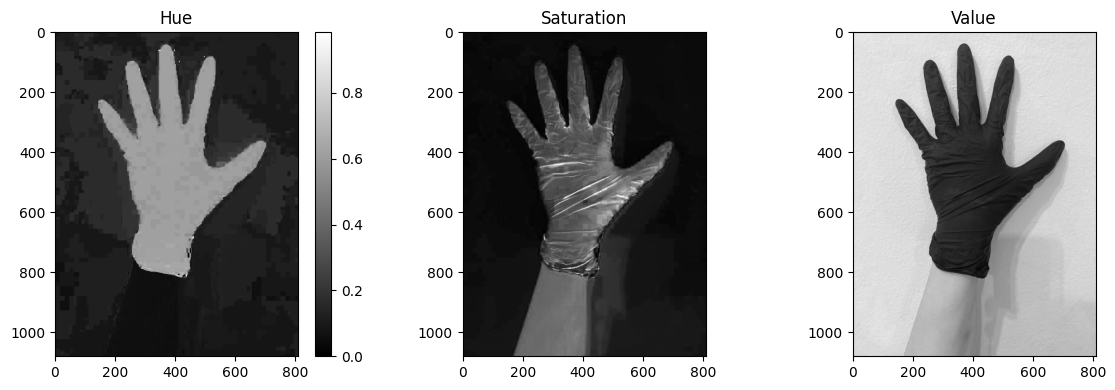

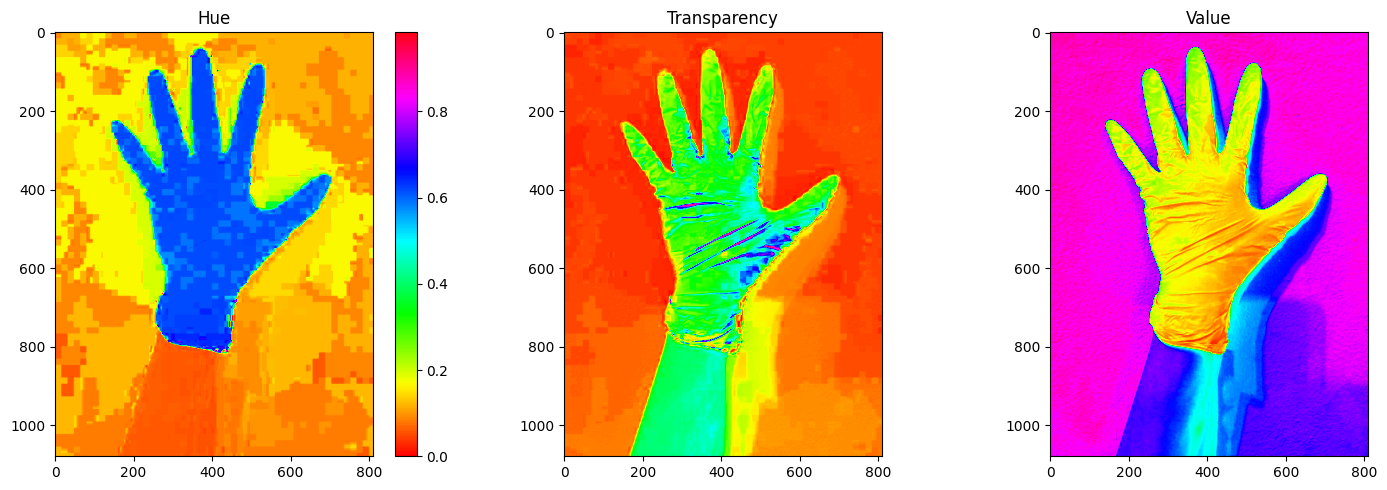

In [3]:
def visualize_hsv_channels(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    channel_titles = ['Hue', 'Saturation', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='gray')
        ax[i].set_title(title)
        
    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='gray'))
    fig.tight_layout()
    
    plt.show()

def visualize_hsv_colormap(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    channel_titles = ['Hue', 'Transparency', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='hsv')
        ax[i].set_title(title)

    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='hsv'))
    fig.tight_layout()

    plt.show()

# Load the image and visualize the HSV channels
img = imread("D:\OneDrive - Asia Pacific University\Degree Year 3\Image Processing, Computer Vision and Pattern Recognition\Assignment\Source Code\Glove-Defect-Detection-System\Images\Cloth\\test1.jpg")
visualize_hsv_channels(img)
visualize_hsv_colormap(img)

Hue color palette finder for RESIZE IMAGE (does use cv2.resize from cv2 function)

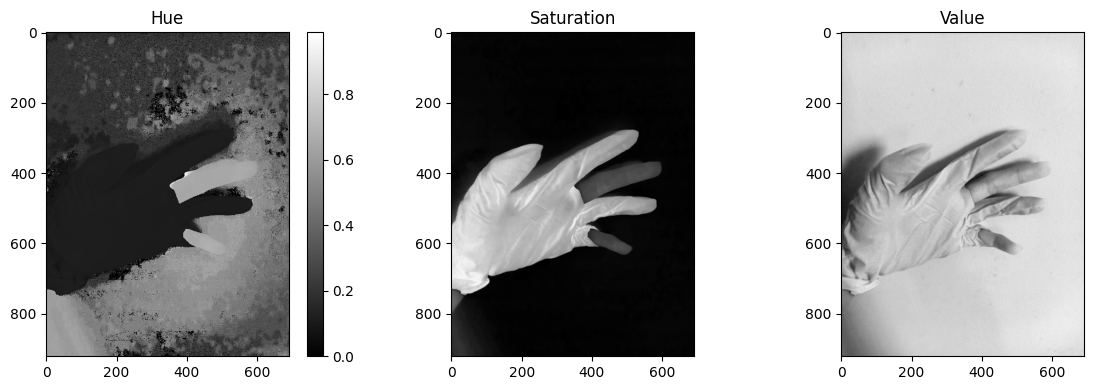

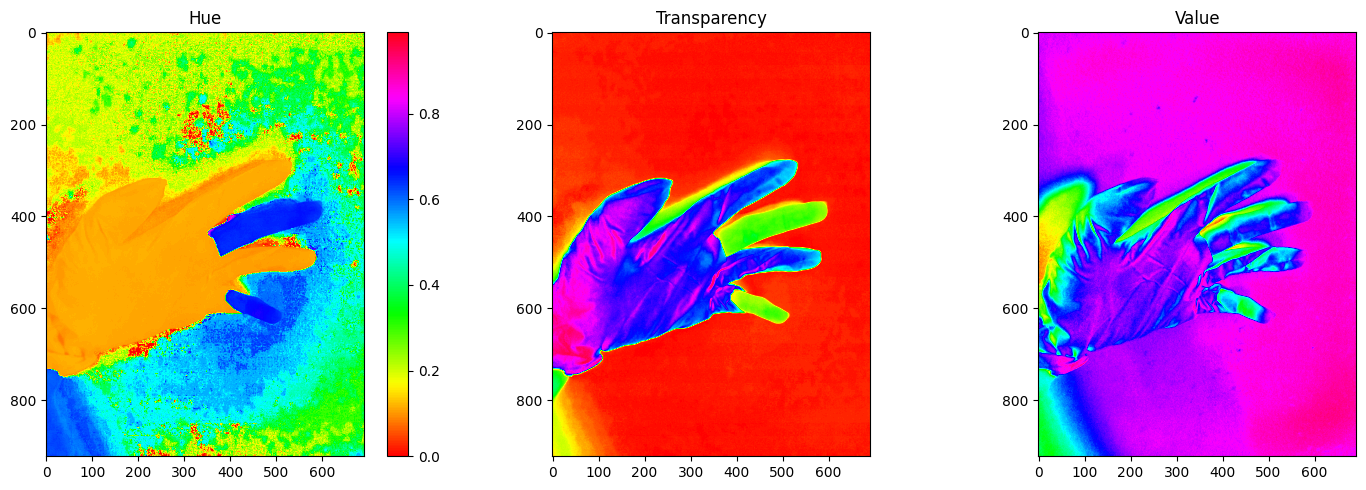

In [3]:
def visualize_hsv_channels(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    channel_titles = ['Hue', 'Saturation', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='gray')
        ax[i].set_title(title)
        
    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='gray'))
    fig.tight_layout()
    
    plt.show()

def visualize_hsv_colormap(image):
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    channel_titles = ['Hue', 'Transparency', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='hsv')
        ax[i].set_title(title)

    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='hsv'))
    fig.tight_layout()

    plt.show()

# Load the image and visualize the HSV channels
image = cv.imread("C:\\Users\\jangj\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Latex\\missing_finger.jpg")
new_img = cv.resize(image, None, fx=0.2, fy=0.2)
visualize_hsv_channels(new_img)
visualize_hsv_colormap(new_img)

Method to test whether, stain are segmented properly (NON-RESIZED IMAGE ONLY)

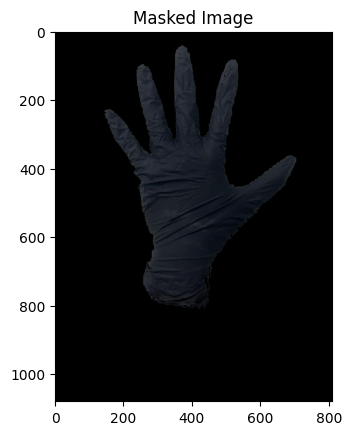

In [4]:
def apply_mask(lower_hue, upper_hue, saturation_threshold):
    hsv_image = rgb2hsv(img)

    lower_mask = hsv_image[..., 0] > lower_hue
    upper_mask = hsv_image[..., 0] < upper_hue
    saturation_mask = hsv_image[..., 1] > saturation_threshold

    mask = np.logical_and.reduce((lower_mask, upper_mask, saturation_mask))
    masked_image = img * np.expand_dims(mask, axis=2)

    plt.imshow(masked_image)
    plt.title("Masked Image")
    plt.show()
apply_mask(0.5, 0.7, 0.1) # adjust accordingly based on ur 
# apply_mask(0.0, 0.09, 0.3) # Hand
# apply_mask(0.08, 0.3, 0.0) # CLoth


Method to test whether, stain are segmented properly (RESIZED IMAGE ONLY)

In [23]:
def apply_mask(lower_hue, upper_hue, saturation_threshold):
    image = cv.imread("C:\\Users\\jangj\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Latex\\missing_finger.jpg")
    new_img = cv.resize(image, None, fx=0.2, fy=0.2)
    hsv_image = rgb2hsv(new_img)

    lower_mask = hsv_image[..., 0] > lower_hue
    upper_mask = hsv_image[..., 0] < upper_hue
    saturation_mask = hsv_image[..., 1] > saturation_threshold

    mask = np.logical_and.reduce((lower_mask, upper_mask, saturation_mask))
    masked_image = new_img * np.expand_dims(mask, axis=2)

    cv.imshow("Masked Image", masked_image)
    cv.waitKey(0)
    cv.destroyAllWindows()
apply_mask(0.1, 0.2, .5)